# **IMPORTING IMPORTANT LIBRARIES**

**import numpy as np**: Imports NumPy for numerical operations, such as handling arrays and performing mathematical computations.

**import pandas as pd:** Imports Pandas for data manipulation, especially for loading and working with structured datasets.

**import matplotlib.pyplot as plt**: Imports Matplotlib for creating visualizations, such as plotting training error progress.

**from sklearn.metrics import confusion_matrix:** Imports the confusion_matrix function from Scikit-learn to evaluate classification performance.

**import seaborn as sns:** Imports Seaborn for enhanced data visualization, especially for creating heatmaps like the confusion matrix.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# **MOUNTING THE GOOGLE DRIVE**

In [124]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DISPLAYING THE EXCEL FILE DATA**

File Path:
Defines the path of the CSV file to be loaded.

Read CSV:
Loads the CSV data into a Pandas DataFrame (df).

Display:
Displays the styled DataFrame in the output.

In [125]:
import pandas as pd
from IPython.display import display

file_path = '/content/drive/My Drive/cvpr assignment 2/Animal.csv'


df = pd.read_csv(file_path)


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


print("Full Dataset Displayed as a Table:")
display(df)


Full Dataset Displayed as a Table:


,Class,Feature1,Feature2
0,Rabbit,29,56
1,Dog,66,39
2,Rabbit,21,46
3,Rabbit,11,42
4,Dog,66,24
5,Dog,66,36
6,Rabbit,26,41
7,Cat,31,64
8,Rabbit,10,40
9,Rabbit,28,41


# **Data Splitting: Training and Testing Set Creation (80/20 Split)**
Random Shuffle of Indices:

indices = np.random.permutation(len(X)) creates a random permutation of indices from 0 to the length of the dataset X. This ensures that the data is shuffled before splitting.

Define Split Ratio:

split_ratio = 0.8 specifies the proportion of data to be used for training (80%).

Calculate Train Size:
train_size = int(len(X) * split_ratio) calculates the number of samples to be used for training based on the split ratio.

Split Indices:
train_indices = indices[:train_size] selects the first 80% of the shuffled indices for training.

test_indices = indices[train_size:] selects the remaining 20% of the shuffled indices for testing.

Split Data:
X_train = X[train_indices] and X_test = X[test_indices] split the feature data (X) into training and testing sets based on the indices.

y_train = Y[train_indices] and y_test = Y[test_indices] split the target labels (Y) accordingly.
Shape Check:

The print statements output the shapes of the training and testing sets (X_train, X_test, y_train, and y_test) to ensure the split is correct.

In [126]:
indices = np.random.permutation(len(X))
split_ratio = 0.8
train_size = int(len(X) * split_ratio)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = Y[train_indices]
y_test = Y[test_indices]


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (160, 2)
X_test shape: (40, 2)
y_train shape: (160, 3)
y_test shape: (40, 3)


# **Neural Network Implementation for Multi-Class Classification with Custom Architecture**


**Data Preprocessing:** Loads the dataset, encodes categorical labels, standardizes features, and applies one-hot encoding for labels.

**Neural Network Architecture:** Defines a neural network with 2 input neurons, 3 hidden layers, and 3 output neurons (for 3 classes).

**Activation Functions:** ReLU for hidden layers and Softmax for the output layer.

**Feedforward & Backpropagation:** Propagates input through layers and adjusts weights using the backpropagation algorithm.

In [127]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('/content/drive/My Drive/cvpr assignment 2/Animal.csv')


label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

X = df[["Feature1", "Feature2"]].values
labels = df["Class"].values


num_classes = len(np.unique(labels))
Y = np.zeros((labels.size, num_classes))
for i, label in enumerate(labels):
    Y[i, label] = 1


scaler = StandardScaler()
X = scaler.fit_transform(X)

class NeuralNetwork:
    def __init__(self):
        input_neurons = 2
        hidden1_neurons = 14
        hidden2_neurons = 11
        hidden3_neurons = 15
        output_neurons = 3

        self.learning_rate = 0.0001

        self.W_H1I = np.random.randn(input_neurons, hidden1_neurons) * np.sqrt(2 / (input_neurons + hidden1_neurons))
        self.W_H2H1 = np.random.randn(hidden1_neurons, hidden2_neurons) * np.sqrt(2 / (hidden1_neurons + hidden2_neurons))
        self.W_H3H2 = np.random.randn(hidden2_neurons, hidden3_neurons) * np.sqrt(2 / (hidden2_neurons + hidden3_neurons))
        self.W_OH3 = np.random.randn(hidden3_neurons, output_neurons) * np.sqrt(2 / (hidden3_neurons + output_neurons))

    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        else:
            return np.maximum(0, x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def feedforward(self, X):
        self.hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.relu(self.hidden1_input)

        self.hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.relu(self.hidden2_input)

        self.hidden3_input = np.dot(self.hidden2_output, self.W_H3H2)
        self.hidden3_output = self.relu(self.hidden3_input)

        self.output_input = np.dot(self.hidden3_output, self.W_OH3)
        pred = self.softmax(self.output_input)
        return pred

    def backpropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = hidden3_error * self.relu(self.hidden3_input, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = hidden2_error * self.relu(self.hidden2_input, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = hidden1_error * self.relu(self.hidden1_input, der=True)

        self.W_OH3 += self.hidden3_output.T.dot(output_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H1I += X.T.dot(hidden1_delta)

    def train(self, X, Y, epochs=100000):
        errors = []
        for epoch in range(epochs):
            pred = self.feedforward(X)
            self.backpropagation(X, Y, pred)
            error = np.mean(np.square(Y - pred))
            errors.append(error)
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Error: {error:.4f}")
        return errors

NN = NeuralNetwork()
errors = NN.train(X_train, y_train, epochs=100000)



Epoch 0, Error: 0.2518
Epoch 1000, Error: 0.0005
Epoch 2000, Error: 0.0001
Epoch 3000, Error: 0.0000
Epoch 4000, Error: 0.0000
Epoch 5000, Error: 0.0000
Epoch 6000, Error: 0.0000
Epoch 7000, Error: 0.0000
Epoch 8000, Error: 0.0000
Epoch 9000, Error: 0.0000
Epoch 10000, Error: 0.0000
Epoch 11000, Error: 0.0000
Epoch 12000, Error: 0.0000
Epoch 13000, Error: 0.0000
Epoch 14000, Error: 0.0000
Epoch 15000, Error: 0.0000
Epoch 16000, Error: 0.0000
Epoch 17000, Error: 0.0000
Epoch 18000, Error: 0.0000
Epoch 19000, Error: 0.0000
Epoch 20000, Error: 0.0000
Epoch 21000, Error: 0.0000
Epoch 22000, Error: 0.0000
Epoch 23000, Error: 0.0000
Epoch 24000, Error: 0.0000
Epoch 25000, Error: 0.0000
Epoch 26000, Error: 0.0000
Epoch 27000, Error: 0.0000
Epoch 28000, Error: 0.0000
Epoch 29000, Error: 0.0000
Epoch 30000, Error: 0.0000
Epoch 31000, Error: 0.0000
Epoch 32000, Error: 0.0000
Epoch 33000, Error: 0.0000
Epoch 34000, Error: 0.0000
Epoch 35000, Error: 0.0000
Epoch 36000, Error: 0.0000
Epoch 37000, E

# **Training Progress and Evaluation Metrics for Neural Network Model**

Plot Training Error:

This section visualizes the training process by plotting the Mean Squared Error (MSE) over the epochs. The plot provides insight into how the model's performance improves over time, with the x-axis representing the epochs and the y-axis showing the MSE. The title, "Training Error Progression," highlights the trend of error reduction as the training progresses.

Print Test Loss and Accuracy:

This section evaluates the model's performance on unseen test data by printing the test loss and accuracy. The test loss is displayed with four decimal precision to indicate the model's prediction error, while the accuracy is presented as a percentage, reflecting how effectively the model classifies the test data.

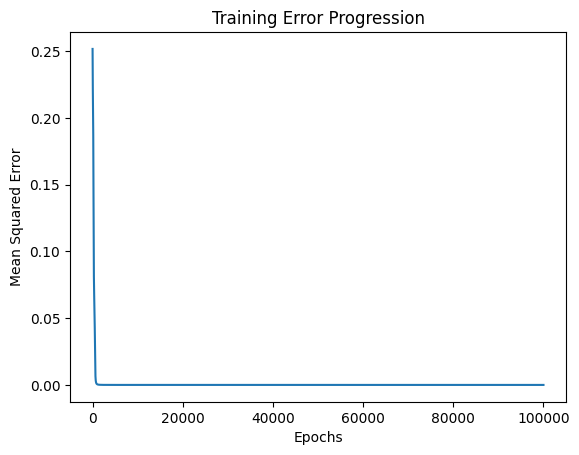

Test Loss: 0.0000
Test Accuracy: 100.00%


In [128]:

plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Progression')
plt.show()


print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

# **Confusion Matrix Visualization**
Predictions on Test Data:

This step involves using the trained neural network to make predictions on the unseen test data (X_test). The predictions represent the model's confidence for each class in a one-hot encoded format.

Convert Predictions and True Labels to Labels:

The model's predictions are converted from one-hot encoding to label format using np.argmax, which identifies the class with the highest confidence. Similarly, the true test labels (y_test) are transformed into label format for direct comparison with the predictions.

Compute the Confusion Matrix:

A confusion matrix is calculated by comparing the true labels (y_test_labels) with the predicted labels (y_pred_labels). This matrix summarizes the model’s performance, showing how many instances were correctly or incorrectly classified for each class.

Plot the Confusion Matrix:

The confusion matrix is visualized as a heatmap using seaborn. This graphical representation makes it easier to interpret the model’s classification performance, highlighting areas of accuracy and errors across different classes.

Print the Confusion Matrix:

The numerical confusion matrix is printed to the console for detailed analysis, providing exact values for each classification category, which can be useful for in-depth evaluation or debugging.

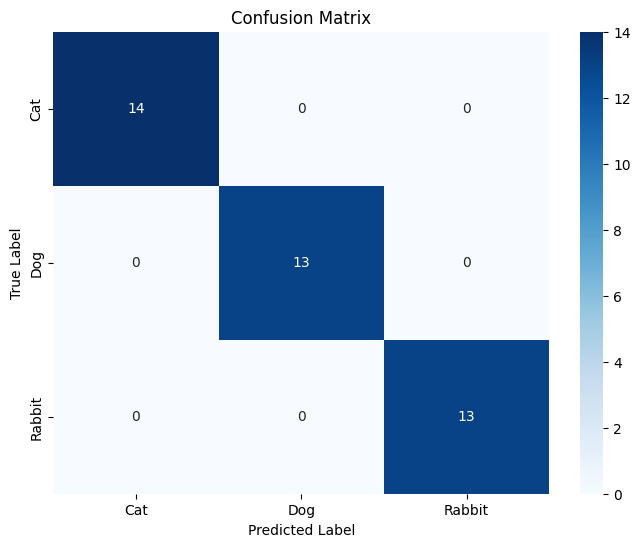

Confusion Matrix:
[[14  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


predictions = NN.feedforward(X_test)


y_pred_labels = np.argmax(predictions, axis=1)


y_test_labels = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
